In [1]:
!pip install -U scikit-fuzzy

Enter Data Redundancy (0-100): 90
Enter Degradation Level (0-100): 10
Enter Error History (0-100): 6

Computed Results:
Error Severity: 71.82222222222221
Error Mitigation: 50.00000000000004

Generated Sample Dataset:
{'data_redundancy': 35.51627086980261, 'degradation_level': 86.66146513164801, 'error_history': 98.16117653356274, 'error_severity': 28.371647688847418, 'error_mitigation': 55.88370789412628}
{'data_redundancy': 85.20118005167153, 'degradation_level': 49.68743766693078, 'error_history': 12.95081629667527, 'error_severity': 50.00688413869726, 'error_mitigation': 56.99670209845287}
{'data_redundancy': 68.72871989468757, 'degradation_level': 62.394945970801594, 'error_history': 36.55268189898378, 'error_severity': 50.00000000000005, 'error_mitigation': 53.04432999554489}
{'data_redundancy': 13.557423577196648, 'degradation_level': 27.715336401515767, 'error_history': 1.8407609143921366, 'error_severity': 49.99999999999998, 'error_mitigation': 41.38105238289559}
{'data_redunda

C:\Users\sethr\Ana\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


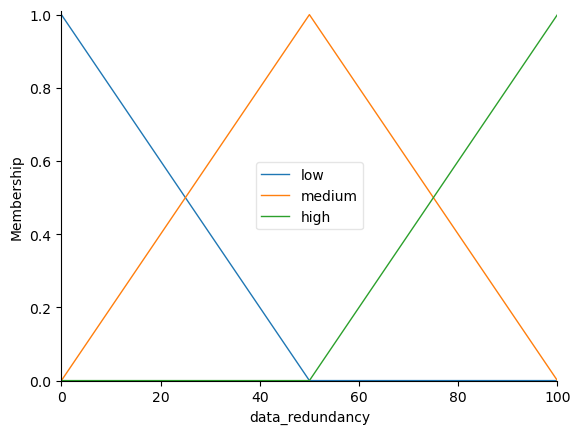

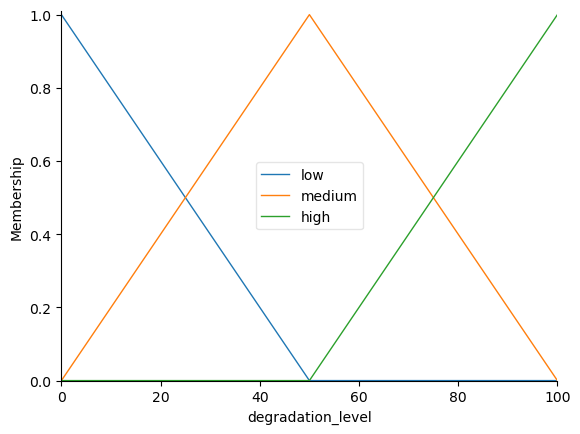

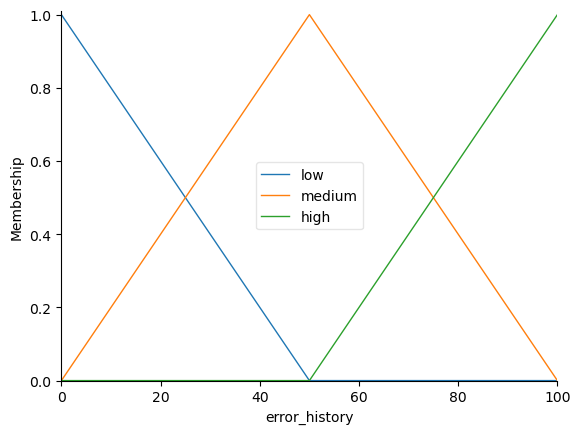

In [2]:
import numpy as np
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

def setup_fuzzy_system():
    # Define fuzzy variables
    inputs = {
        'data_redundancy': ctrl.Antecedent(np.arange(0, 101, 1), 'data_redundancy'),
        'degradation_level': ctrl.Antecedent(np.arange(0, 101, 1), 'degradation_level'),
        'error_history': ctrl.Antecedent(np.arange(0, 101, 1), 'error_history')
    }

    outputs = {
        'error_severity': ctrl.Consequent(np.arange(0, 101, 1), 'error_severity', defuzzify_method='centroid'),
        'error_mitigation': ctrl.Consequent(np.arange(0, 101, 1), 'error_mitigation', defuzzify_method='centroid')
    }

    # Apply auto-membership function
    for var in inputs.values():
        var.automf(names=['low', 'medium', 'high'])

    for var in outputs.values():
        var.automf(names=['low', 'medium', 'high'])

    # Define fuzzy rules
    rules = [
        ctrl.Rule(inputs['data_redundancy']['high'] & inputs['degradation_level']['low'] & inputs['error_history']['low'], outputs['error_severity']['high']),
        ctrl.Rule(inputs['data_redundancy']['medium'] & inputs['degradation_level']['medium'] & inputs['error_history']['medium'], outputs['error_severity']['medium']),
        ctrl.Rule(inputs['data_redundancy']['low'] & inputs['degradation_level']['high'] & inputs['error_history']['high'], outputs['error_severity']['low']),
        ctrl.Rule(inputs['data_redundancy']['low'] | inputs['degradation_level']['low'], outputs['error_mitigation']['low']),
        ctrl.Rule(inputs['data_redundancy']['medium'] | inputs['degradation_level']['medium'], outputs['error_mitigation']['medium']),
        ctrl.Rule(inputs['data_redundancy']['high'] | inputs['degradation_level']['high'], outputs['error_mitigation']['high'])
    ]

    # Create control system and simulation object
    ctrl_system = ctrl.ControlSystem(rules)
    sim = ctrl.ControlSystemSimulation(ctrl_system)

    return inputs, outputs, sim

def compute_error_severity(inputs, outputs, sim, data_redundancy_val, degradation_level_val, error_history_val):
    # Set input values
    sim.input['data_redundancy'] = data_redundancy_val
    sim.input['degradation_level'] = degradation_level_val
    sim.input['error_history'] = error_history_val

    # Compute output
    sim.compute()

    # Return output values
    return sim.output['error_severity'], sim.output['error_mitigation']

def generate_sample_data(inputs, outputs, sim, num_samples=10):
    sample_data = []

    for _ in range(num_samples):
        # Simulate random input values
        data_redundancy_val = np.random.uniform(0, 100)
        degradation_level_val = np.random.uniform(0, 100)
        error_history_val = np.random.uniform(0, 100)

        # Compute error severity
        error_severity_val, error_mitigation_val = compute_error_severity(inputs, outputs, sim, data_redundancy_val, degradation_level_val, error_history_val)

        # Store the sample data
        sample_data.append({
            'data_redundancy': data_redundancy_val,
            'degradation_level': degradation_level_val,
            'error_history': error_history_val,
            'error_severity': error_severity_val,
            'error_mitigation': error_mitigation_val
        })

    return sample_data

def plot_membership_functions(inputs):
    # Plot membership functions of the inputs
    for var in inputs.values():
        var.view()
        plt.show()

if __name__ == "__main__":
    # Setup fuzzy system
    fuzzy_inputs, fuzzy_outputs, fuzzy_sim = setup_fuzzy_system()

    # Run the CLI
    data_redundancy_val = float(input("Enter Data Redundancy (0-100): "))
    degradation_level_val = float(input("Enter Degradation Level (0-100): "))
    error_history_val = float(input("Enter Error History (0-100): "))

    error_severity_val, error_mitigation_val = compute_error_severity(fuzzy_inputs, fuzzy_outputs, fuzzy_sim, data_redundancy_val, degradation_level_val, error_history_val)

    print(f"\nComputed Results:")
    print(f"Error Severity: {error_severity_val}")
    print(f"Error Mitigation: {error_mitigation_val}")

    # Generate and print a sample dataset with simulated errors
    sample_dataset = generate_sample_data(fuzzy_inputs, fuzzy_outputs, fuzzy_sim, num_samples=5)
    print("\nGenerated Sample Dataset:")
    for sample in sample_dataset:
        print(sample)

    # Plot membership functions
    plot_membership_functions(fuzzy_inputs)
